# Modelo de KMeans


---


[documentação](https://scikit-learn.org/stable/index.html) <br>
---

>[Modelo de KMeans](#scrollTo=QoBv84MIUa-h)

>>[documentação](#scrollTo=DqMh54wYK1UQ)

>>[1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>[2. Vamos explorar o dataset](#scrollTo=2S0UrVDEf8E-)

>>[3. Vamos aplicar o modelo de Kmeans](#scrollTo=BKzodGb8R7t9)

>>[4. Vamos calcular as inércias e aplicar o elbow method](#scrollTo=fUSKDMyr_7R_)

>>[5. Vamos avaliar o Silhouette score](#scrollTo=sHAG-N7uAsFi)



## 1.&nbsp;Vamos começar por importar os packages e o dataset

In [1]:
# packages gerais
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# vamos importar o dataset das iris
wine = load_wine()
X = pd.DataFrame(wine.data, columns = wine.feature_names)

## 2.&nbsp;Vamos explorar o dataset

In [2]:
# exploração inicial
X.head()
# X.info()
# X.shape
# X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 3.&nbsp;Vamos aplicar o modelo de Kmeans

In [3]:
# importamos o modelo
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init = 10, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [4]:
labels

array([4, 4, 4, 0, 2, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 2, 2, 2,
       4, 4, 2, 2, 4, 0, 2, 4, 0, 0, 4, 0, 4, 2, 2, 4, 4, 2, 2, 4, 4, 1,
       2, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 3, 1, 3, 1, 3, 3, 1,
       3, 3, 2, 1, 2, 3, 3, 4, 2, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 2, 2, 3, 1, 1, 1, 3, 3, 3, 1,
       1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 3, 3, 1, 2, 2, 2,
       2, 1])

## 4.&nbsp;Vamos calcular as inércias e aplicar o elbow method

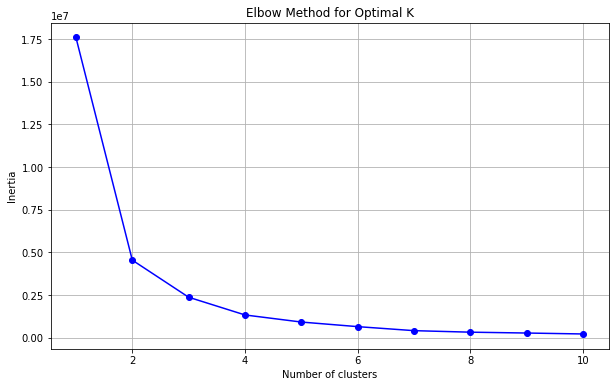

In [5]:
# vamos aplicar o elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# vamos visualizar os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

## 5.&nbsp;Vamos avaliar o Silhouette score

Silhouette Score for K=3: 0.5711381937868838


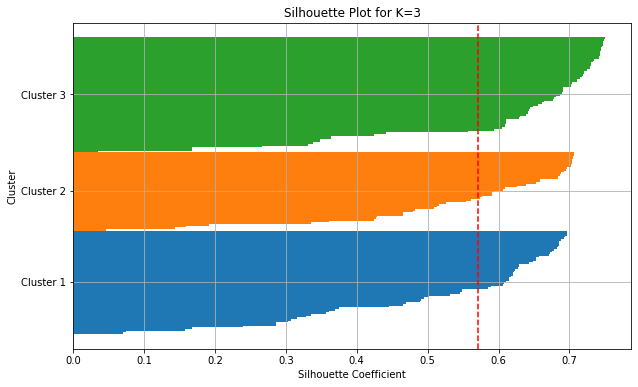

In [6]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Vamos escolher o número óptimo de clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# vamos avaliar o silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for K={optimal_k}: {silhouette_avg}')

# vamos visualizar os resultados
silhouette_vals = silhouette_samples(X, y_kmeans)

plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
yticks = []

for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, [f'Cluster {i+1}' for i in range(optimal_k)])
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title(f'Silhouette Plot for K={optimal_k}')
plt.grid(True)
plt.show()